In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import mpl_toolkits.mplot3d
import time
from scipy.optimize import minimize

def func1(x):
    alpha=1000 #set alpha
    dim=x.shape[0] #dimension number
    y=0;
    for i in range(dim):
        y+=alpha**(i/(dim-1))*x[i]**2
    return y

func2 = lambda x: (1-x[0])**2 + 100*(x[1]-x[0]**2)**2;

epsilon=10**(-16) #set epsilon
func3 = lambda x: np.log(epsilon+func1(x))

q=10**8
funch = lambda x: (np.log(1+np.exp(-np.absolute(q*x)))+np.maximum(q*x,0))/q

def func4(x):
    dim=x.shape[0] #dimension number
    y=0;
    for i in range(dim):
        y+=funch(x[i])+100*funch(-x[i])
    return y

def func5(x):
    dim=x.shape[0] #dimension number
    y=0;
    for i in range(dim):
        y+=funch(x[i])**2+100*funch(-x[i])**2
    return y

print(np.random.rand(2))

[0.61069136 0.03342658]


f1
Nelder-Mead suc.: 145.48 	 0.00540625 	 5.536466146801632e-13 	 1.0 (suc. rate)
CG suc.: 5.857971014492754 	 0.002355072463768116 	 9.128235117636314e-14 	 0.69 (suc. rate)
CG fail: 15.529032258064516 	 0.015625 	 1.0019352098876117e-12
BFGS suc.: 8.101293103448276 	 0.002357219827586207 	 5.857186239838015e-14 	 0.928 (suc. rate)
BFGS fail: 6.972222222222222 	 0.009548611111111112 	 2.4978592494903396e-14


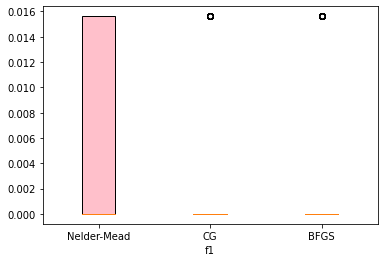

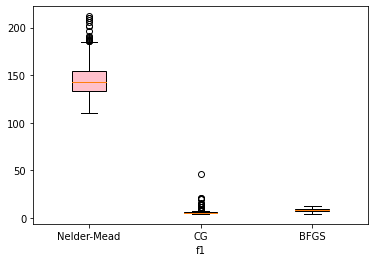

f2
Nelder-Mead suc.: 154.25 	 0.0059375 	 2.867247390658997e-14 	 1.0 (suc. rate)
CG suc.: 24.521929824561404 	 0.009799890350877192 	 2.032177718899437e-11 	 0.456 (suc. rate)
CG fail: 24.639705882352942 	 0.01430376838235294 	 2.4413827563150144e-10
BFGS suc.: 33.43689320388349 	 0.008874393203883495 	 1.9911374313903353e-11 	 0.412 (suc. rate)
BFGS fail: 36.5 	 0.015093537414965986 	 1.4096751095815757e-11


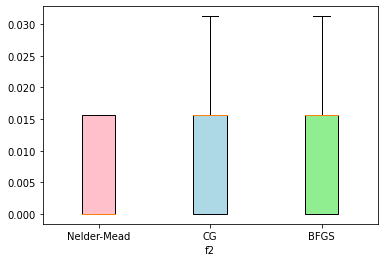

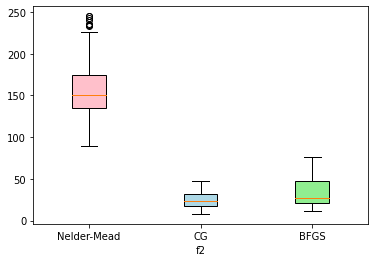

f3
Nelder-Mead suc.: 211.238 	 0.00978125 	 -36.84136089138788 	 1.0 (suc. rate)
CG fail: 83.374 	 0.0486875 	 -27.263129281191954
BFGS fail: 49.23 	 0.0314375 	 -30.768672211685548


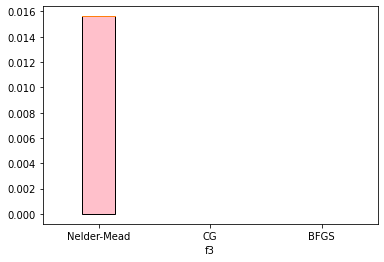

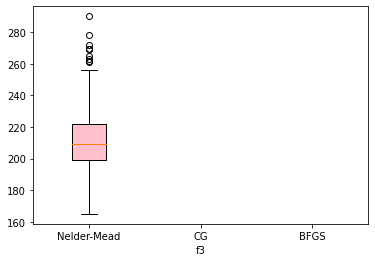

f4
Nelder-Mead suc.: 166.82530120481928 	 0.019703815261044175 	 2.2912510315812757 	 0.996 (suc. rate)
Nelder-Mead fail: 309.5 	 0.03125 	 0.4325298129517202
CG fail: 2.592 	 0.062875 	 2.148327010336332
BFGS suc.: 18.470588235294116 	 0.07628676470588236 	 1.763087643287876e-07 	 0.034 (suc. rate)
BFGS fail: 13.925465838509316 	 0.08880046583850931 	 0.002743533650822638


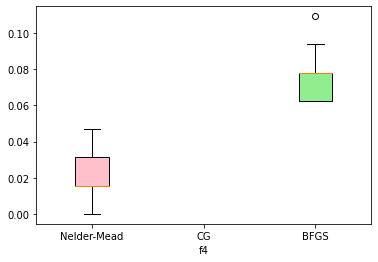

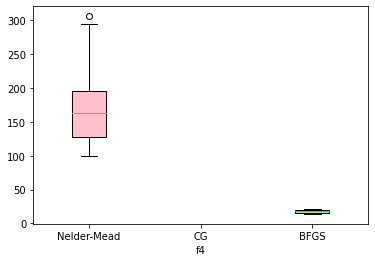

f5
Nelder-Mead suc.: 188.948 	 0.020875 	 5.109110560085086e-12 	 1.0 (suc. rate)
CG suc.: 2.529058116232465 	 0.003350450901803607 	 3.3629379874585526e-14 	 0.998 (suc. rate)
CG fail: 1.0 	 0.015625 	 8.807712181419957e-13
BFGS suc.: 10.046 	 0.00625 	 9.604141857299374e-14 	 1.0 (suc. rate)


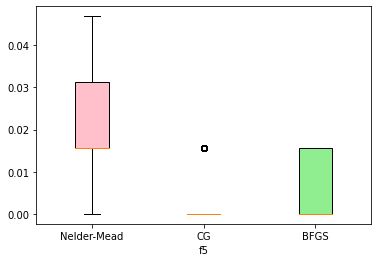

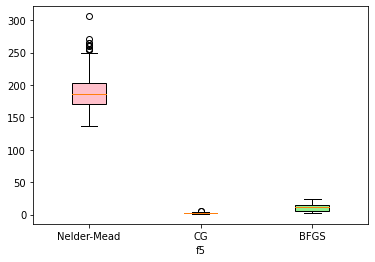

In [2]:
def run_opt(s,t_s,r_s,i_s,t_f,r_f,i_f,func,x,Method,Tol,pt,pi):
    tmp1 = time.process_time()
    res = minimize(func, x, method=Method, tol=Tol, options={"disp": False})
    tmp2 = time.process_time()
    runtime=tmp2-tmp1
    if res.success:
        s += 1
        t_s += runtime
        r_s += res.fun
        i_s += res.nit
        pt.append(runtime)
        pi.append(res.nit)
    else:
        t_f += runtime
        r_f += res.fun
        i_f += res.nit
    return s,t_s,r_s,i_s,t_f,r_f,i_f,pt,pi

def print_result(s,t_s,r_s,i_s,t_f,r_f,i_f,points,Method):
    if s > 0:
        print(Method,"suc.:",i_s/s,"\t",t_s/s,"\t",r_s/s,"\t",s/points,"(suc. rate)")
    if s < points:
        print(Method,"fail:",i_f/(points-s),"\t",t_f/(points-s),"\t",r_f/(points-s))
        
def plot_result(pa,pb,pc,name,timeoriter):
    labels = ['Nelder-Mead', 'CG', 'BFGS']
    data = [pa,pb,pc]
    bplot = plt.boxplot(data, patch_artist=True, labels=labels)  # 设置箱型图可填充
    colors = ['pink', 'lightblue', 'lightgreen']
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)  # 为不同的箱型图填充不同的颜色
    plt.xlabel(name)
    plt.savefig(name+timeoriter)
    plt.show()

def opt(fn,func,tol):
    # function value
    r1_s, r2_s, r3_s, r4_s = 0, 0, 0, 0
    r1_f, r2_f, r3_f, r4_f = 0, 0, 0, 0
    # time, Simon said we can calculate average time of success/fail. Doing that.
    t1_s, t2_s, t3_s, t4_s = 0, 0, 0, 0
    t1_f, t2_f, t3_f, t4_f = 0, 0, 0, 0
    # frequency of success, minimize would fail
    s1, s2, s3, s4 = 0, 0, 0, 0
    # number of iteration
    i1_s, i2_s, i3_s, i4_s = 0, 0, 0, 0
    i1_f, i2_f, i3_f, i4_f = 0, 0, 0, 0
    # methods
    m1, m2, m3, m4 = "Nelder-Mead", "CG", "BFGS", "trust-exact"
    pt1=[];pi1=[]
    pt2=[];pi2=[]
    pt3=[];pi3=[]
    points = 500

    for i in range(points):
        dim = 3 #point dimension number
        x = np.random.rand(dim)*5 #generate random point
        s1,t1_s,r1_s,i1_s,t1_f,r1_f,i1_f,pt1,pi1=run_opt(s1,t1_s,r1_s,i1_s,t1_f,r1_f,i1_f,func,x,m1,tol,pt1,pi1)
        s2,t2_s,r2_s,i2_s,t2_f,r2_f,i2_f,pt2,pi2=run_opt(s2,t2_s,r2_s,i2_s,t2_f,r2_f,i2_f,func,x,m2,tol,pt2,pi2)
        s3,t3_s,r3_s,i3_s,t3_f,r3_f,i3_f,pt3,pi3=run_opt(s3,t3_s,r3_s,i3_s,t3_f,r3_f,i3_f,func,x,m3,tol,pt3,pi3)
        #s4,t4_s,r4_s,i4_s,t4_f,r4_f,i4_f=run_opt(s4,t4_s,r4_s,i4_s,t4_f,r4_f,i4_f,func,x,m4,tol)
    
    print_result(s1,t1_s,r1_s,i1_s,t1_f,r1_f,i1_f,points,m1)
    print_result(s2,t2_s,r2_s,i2_s,t2_f,r2_f,i2_f,points,m2)
    print_result(s3,t3_s,r3_s,i3_s,t3_f,r3_f,i3_f,points,m3)
    #print_result(s4,t4_s,r4_s,i4_s,t4_f,r4_f,i4_f,points,m4)
    plot_result(pt1,pt2,pt3,fn,"_time.pdf")
    plot_result(pi1,pi2,pi3,fn,"_iter.pdf")

print("f1")
opt("f1",func1, 1e-6)
print("f2")
opt("f2",func2, 1e-6)
print("f3")
opt("f3",func3, 1e-6)
print("f4")
opt("f4",func4, 1e-6)
print("f5")
opt("f5",func5, 1e-6)